In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import statistics as st
from sklearn.linear_model import LinearRegression
from datetime import datetime 

In [2]:
data = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
display(data)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,964,969,981,989,998,1004,1029,1050,1076,1099
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,7542,7728,7918,8113,8306,8503,8697,8857,8997,9134
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,762,762,762,762,762,763,763,763,763,764
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,52,58,60,61,69,70,70,71,74,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,251,251,251,251,251,299,441,443,458,463
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,184,197,209,212,222,233,249,256,278,283
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,34,34,78,78,87,87,87,87,87,87
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,2140,2350,2551,2738,2929,3100,3266,3424,3563,3686


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,107,107,107,107,107,107,107,107,107,107
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,3082,3084,3086,3087,3090,3092,3089,3090,3092,3092
10,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,...,29,29,29,29,29,29,29,29,29,29
11,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,1058,1058,1060,1061,1056,1057,1058,1058,1058,1058
12,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,439,439,439,439,439,439,440,440,440,440
13,Tasmania,Australia,-41.4545,145.9707,0,0,0,0,0,0,...,228,228,228,228,228,228,228,228,228,228
14,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,1581,1593,1593,1603,1605,1610,1618,1628,1634,1645
15,Western Australia,Australia,-31.9505,115.8605,0,0,0,0,0,0,...,557,557,557,560,560,564,570,570,577,585


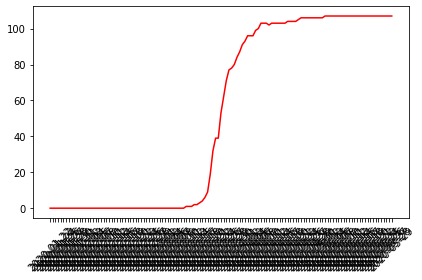

In [4]:
japan = data[data["Country/Region"] == "Australia"]
display(japan)
time_ser = japan.iloc[:,4:]
#display(list(time_ser.iloc[0]))
fig, ax = plt.subplots()
fig.canvas.draw()
col = time_ser.iloc[0]
dates=list(time_ser)
date_object = datetime.strptime(dates[0], '%m/%d/%y')
x_values = [datetime.strptime(str(d),"%m/%d/%y").date() for d in dates]

plt.plot(dates, col, c = "red")

ax.set_xticklabels(x_values, rotation=45)
plt.tight_layout()

plt.show()


In [5]:
da = pd.read_csv("csse_covid_19_data/csse_covid_19_daily_reports/05-29-2020.csv")
au = da[da["Country_Region"] == "Australia"]
display(au)
T_R=sum(list(da["Recovered"]))
T_D=sum(list(da["Deaths"]))
T_C=sum(list(da["Confirmed"]))
AU_R=sum(list(au["Recovered"]))
AU_D=sum(list(au["Deaths"]))
AU_A=sum(list(au["Active"]))
AU_C=sum(list(au["Confirmed"]))
print("Confirmed in AU: ",sum(list(au["Confirmed"])))
print("Recovered in AU: ",sum(list(au["Recovered"])))
print("Deaths in AU:    ",sum(list(au["Deaths"])))
print("Total Confirmed: ",sum(list(da["Confirmed"])))
print("Total Recovered: ",sum(list(da["Recovered"])))
print("Total Deaths:    ",sum(list(da["Deaths"])))
print("Total Active:    ",sum(list(da["Active"])))
print("Recover Rate:    ",np.round(T_R*100/T_C,3),"%")
print("Deaths Rate:     ",np.round(T_D*100/T_C,3),"%")
print("AU Recover Rate: ",np.round(AU_R*100/AU_C,3),"%")
print("AU Active Rate:  ",np.round(AU_A*100/AU_C,3),"%")   
print("AU Deaths Rate:  ",np.round(AU_D*100/AU_C,3),"%")        

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
3047,NaN,NaN,Australian Capital Territory,Australia,2020-05-30 02:32:48,-35.4735,149.0124,107,3,104,0,"Australian Capital Territory, Australia",24.994160,2.803738
3216,NaN,NaN,New South Wales,Australia,2020-05-30 02:32:48,-33.8688,151.2093,3092,48,2683,361,"New South Wales, Australia",38.088199,1.552393
3224,NaN,NaN,Northern Territory,Australia,2020-05-30 02:32:48,-12.4634,130.8456,29,0,29,0,"Northern Territory, Australia",11.807818,0.000000
3256,NaN,NaN,Queensland,Australia,2020-05-30 02:32:48,-27.4698,153.0251,1058,7,1045,6,"Queensland, Australia",20.682240,0.661626
3298,NaN,NaN,South Australia,Australia,2020-05-30 02:32:48,-34.9285,138.6007,440,4,435,1,"South Australia, Australia",25.049815,0.909091
3305,NaN,NaN,Tasmania,Australia,2020-05-30 02:32:48,-42.8821,147.3272,228,13,205,10,"Tasmania, Australia",42.577031,5.701754
3334,NaN,NaN,Victoria,Australia,2020-05-30 02:32:48,-37.8136,144.9631,1645,19,1553,73,"Victoria, Australia",24.811837,1.155015
3337,NaN,NaN,Western Australia,Australia,2020-05-30 02:32:48,-31.9505,115.8605,585,9,551,25,"Western Australia, Australia",22.238273,1.538462


Confirmed in AU:  7184
Recovered in AU:  6605
Deaths in AU:     103
Total Confirmed:  5924275
Total Recovered:  2493535
Total Deaths:     364867
Total Active:     3096867
Recover Rate:     42.09 %
Deaths Rate:      6.159 %
AU Recover Rate:  91.94 %
AU Active Rate:   6.626 %
AU Deaths Rate:   1.434 %
